In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 15

In [5]:
def H(x):
    """
    Heaviside step function
    """
    return 1/(1+np.exp(-50*x))

In [6]:
def delta1(D_0, m1, m2):
    """
    Uncertainty function one
    """
#     m = 1.4
    M = ((m1*m2)**(3/5)/(m1+m2)**(1/5))**(5/6)
    r_0 = 6.5e3*M
    eps = 0.74
    sig = 1.03
    rad = np.sqrt((1+eps*np.cos(4*56*np.pi/180))/(sig*(1-eps**2)))
    return D_0*rad/r_0


def delta2(D_0, m1, m2):
    """
    Uncertainty function two
    """
#     m = 1.4
    M = ((m1*m2)**(3/5)/(m1+m2)**(1/5))**(5/6)
    r_0 = 6.5e3*M
    eps = 0.74
    sig = 1.03
    rad = np.sqrt((1-eps*np.cos(4*56*np.pi/180))/(sig*(1-eps**2)))
    return D_0*rad/r_0

In [7]:
def dp(D_0, D, v_0, v, m1, m2):
    d1 = delta1(D_0, m1, m2) # 0.1
    d2 = delta2(D_0, m1, m2) # 0.057
    M = ((m1*m2)**(3/5)/(m1+m2)**(1/5))**(5/6)
    Dmax = 6.5e3*M
#     d1 = 0.103
#     d2 = 0.057
#     print(d1, d2)
    Dd = D/D_0
    e = np.exp(-1/(2*d1**2) * (v/Dd - v_0)**2 - 
              1/(2*d2**2)*((1+v**2)/(2*Dd) - (1+v_0**2)/2)**2)
    return Dd**2*e*H(D/D_0)*H(Dd)*H(Dmax/D_0 - Dd)*H(1-v**2)

In [8]:
def pdf(D0, v0, m1, m2):
    dspace = np.linspace(D0/3, 5*D0, int(1e3))
    vspace = np.linspace(-1, 1, 1000)
    pdf = 0
    for v in vspace:
        pdf += dp(D0, dspace, v0, v, m1, m2)
    return pdf / pdf.sum()

898.6359458362947


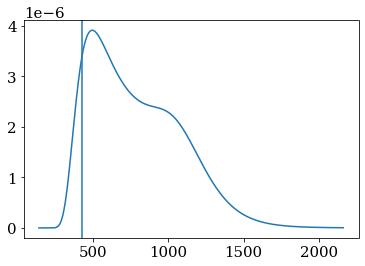

In [11]:
D0 = 432
PDF = pdf(D0, 0.31, 1.4, 1.4)
plt.plot(np.linspace(D0/3, 5*D0, int(1e3)), PDF/np.linspace(D0/3, 5*D0, int(1e3)))
plt.axvline(D0)
print(np.average(np.linspace(D0/3, 5*D0, int(1e3)), weights=PDF))
plt.show()

In [7]:
def d_est(D0, v0):
    d_est = 0
    d2_est = 0
    d_err = 0
    p = pdf(D0, v0)
    for j in range(len(p)):
        d_est += p[j] * dspace[j]
    return d_est

In [37]:
D0 = 40
dspace = np.linspace(D0/3, 3*D0, int(1e3))
vspace = np.linspace(0, 1, 100)
pdfl = [0]*len(vspace)
for i in range(len(vspace)):
    v0 = vspace[i]
    pdf = 0
    for v in vspace:
        pdf += dp(D0, dspace, v0, v, 1.4, 1.4)
    pdf /= pdf.sum()
    pdfl[i] = pdf

In [38]:
d_est_l = [0]*len(pdfl)
d2_est_l = [0]*len(pdfl)
d_err_l = [0]*len(pdfl)
for i in range(len(pdfl)):
    d_est = 0
    d2_est = 0
    d_err = 0
    for j in range(len(pdfl[0])):
        d_est += pdfl[i][j] * dspace[j]
        d2_est += pdfl[i][j] * (dspace[j]**2)
    d_est_l[i] = d_est
    d2_est_l[i] = d2_est
    d_err_l[i] = np.sqrt(d2_est - d_est**2) / d_est

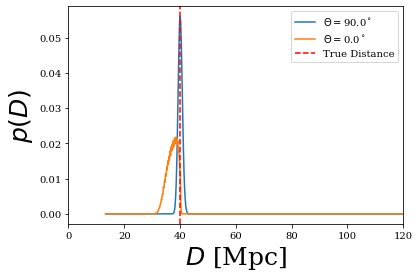

In [40]:
i = 0
for pdf in pdfl:
    if i in [0, 99]:
        plt.plot(dspace, pdf, label="$\Theta=$" + str(np.around(np.arccos(vspace[i])*180/np.pi, 1)) + "$^\circ$")
    i += 1
plt.axvline(40, linestyle='--', color='r', label='True Distance')
plt.xlabel("$D$ [Mpc]", fontsize=25)
plt.ylabel("$p(D)$", fontsize=25)
plt.xlim(0,120)
# plt.ylim(0, 0.01)
plt.legend()
plt.show()

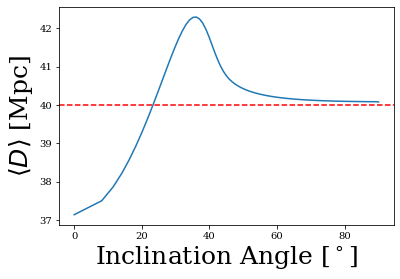

In [41]:
means = []
for pdf in pdfl:
    means += [np.average(dspace, weights=pdf)]
plt.plot(np.arccos(vspace)*180/np.pi, means)
plt.xlabel("Inclination Angle [$^\circ$]", fontsize=25)
plt.ylabel("$\langle D\\rangle$ [Mpc]", fontsize=25)
plt.axhline(40, linestyle='--', color='r')
plt.show()

In [42]:
pdf(10, 0.1)

TypeError: 'numpy.ndarray' object is not callable

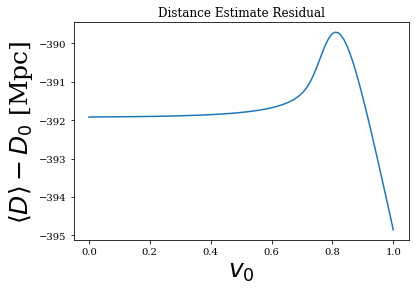

In [44]:
plt.title("Distance Estimate Residual")
plt.plot(vspace, np.array(d_est_l) - np.array([432]*len(pdfl)))
plt.ylabel("$\langle D \\rangle - D_0$ [Mpc]", fontsize=25)
plt.xlabel("$v_0$", fontsize=25)
plt.show()

# d_est(436, 0.31)

**3D Plotting**

In [26]:
from mpl_toolkits import mplot3d

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

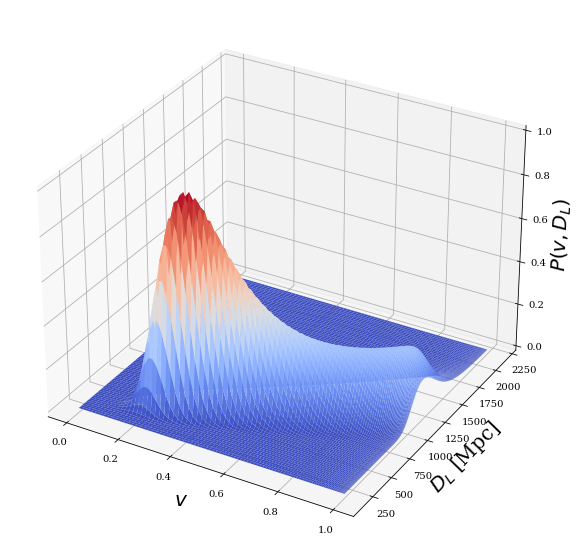

In [28]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
ax = plt.axes(projection='3d')

# Data for 2D D,v PDF
D0 = 432
v0 = 0.31
thetaline = np.linspace(0, np.pi/2, 100)
vline = np.cos(thetaline)
dline = np.linspace(D0/3, D0*5, 100)
vv, dd = np.meshgrid(vline, dline)
positions = np.vstack([vv.ravel(), dd.ravel()])
values = np.vstack([vline, dline])
pmesh = dp(D0, dd, v0, vv, 1.4, 1.4)/(dd)
pmesh /= pmesh.max()
# u = np.random.uniform()
# surf2 = ax.plot_surface(vv, dd, u*np.ones(np.shape(vv)), rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
surf = ax.plot_surface(vv, dd, pmesh, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel("$v$", fontsize=20)
ax.set_ylabel("$D_L$ [Mpc]", fontsize=20)
ax.set_zlabel("$P(v,D_L)$", fontsize=20)
plt.show()

In [29]:
# define a marginal luminosity distance distribution
ddist = np.sum(pmesh, 1)/dline
ddist /= np.sum(ddist)

In [30]:
# sample a random luminosity distance from the marginal dist.
ir = np.random.choice(list(range(len(dline))), p=ddist)
dr = dline[ir]
# from the associated v distribution, sample a random v
vdist = pmesh[ir]
vdist /= np.sum(vdist)
vr = np.random.choice(vline, p=vdist)
# informed guess for v, dL
print(dr, vr)

1488.0 0.984807753012208


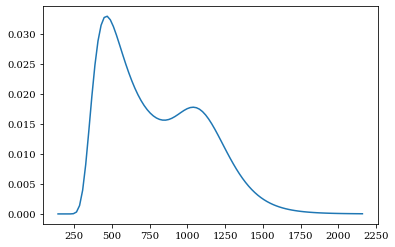

In [31]:
plt.plot(dline, ddist)
# plt.axvline(436)

In [32]:
# let's make sure our sampler is representative

def dlvgen(n):
    i = 0
    drl = []
    vrl = []
    while i<n:
        # sample a random luminosity distance from the marginal dist.
        ir = np.random.choice(list(range(len(dline))), p=ddist)
        dr = dline[ir]
        # from the associated v distribution, sample a random v
        vdist = pmesh[ir]
        vdist /= np.sum(vdist)
        vr = np.random.choice(vline, p=vdist)
        # informed guess for v, dL
        drl += [dr]
        vrl += [vr]
        i+=1
    return drl, vrl

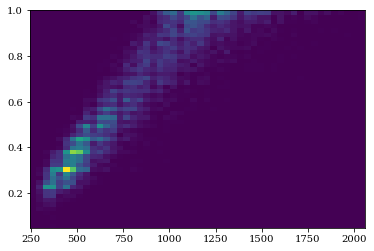

In [33]:
# looks like it is :)
rint = dlvgen(1e4)
plt.hist2d(rint[0], rint[1], 50)
plt.show()

# plt.hist(rint[1], 100)
# plt.show()

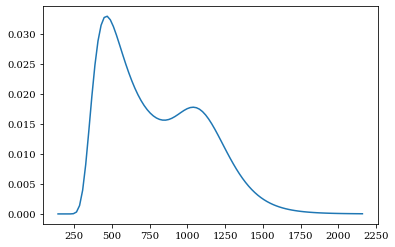

In [35]:
plt.plot(dline, ddist)

In [36]:
np.average(dline, weights=ddist)

789.4618620606582